In [1]:
import numpy as np
import pandas as pd

import re
import requests

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exercici 1

## Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu ``Web_access_log-akumenius.com``

In [2]:
raw_log = pd.read_fwf('Web_access_log-akumenius.com.txt', header=None)

In [3]:
raw_log

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


Fent servir [RegExr](https://regexr.com/) com a eina, he creat una expressió regular que ens ajudarà a extreure tot el que ens fa falta. (Per veure amb detall com he implementat la regular expression, feu clic [aquí](https://regexr.com/5n84h))

In [4]:
regex = r'^(?P<hostname>.*?[A-Za-z\.]*) (?P<ip>[0-9\.]*) - - \[(?P<datetime>.*)\] "(?P<request>[A-Z]*) (?P<requested>[^ ]*) (?P<protocol>[^"]*)" (?P<code>[0-9]*) (?P<code2>[0-9]*)[^"]*"(?P<code_body>[^"]*)" "(?P<user_agent>[^"]*)" VLOG=-$'

# Exercici 2

## Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web

L'expressió regular ha fet trivial aquesta feina, ara només queda extreure la informació fent servir Pandas.

In [5]:
log = raw_log[0].str.extract(regex, flags=re.MULTILINE)

In [6]:
log

,hostname,ip,datetime,request,requested,protocol,code,code2,code_body,user_agent
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39 +0100,GET,/,HTTP/1.1,200,7528,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52 +0100,HEAD,/,HTTP/1.1,200,,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection)


In [7]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   hostname    171674 non-null  object
 1   ip          171674 non-null  object
 2   datetime    171674 non-null  object
 3   request     171674 non-null  object
 4   requested   171674 non-null  object
 5   protocol    171674 non-null  object
 6   code        171674 non-null  object
 7   code2       171674 non-null  object
 8   code_body   171674 non-null  object
 9   user_agent  171674 non-null  object
dtypes: object(10)
memory usage: 20.0+ MB


In [8]:
log['datetime'] = pd.to_datetime(log['datetime'], format="%d/%b/%Y:%H:%M:%S %z")

In [9]:
log.describe()

<ipython-input-9-ded797e55eba>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  log.describe()


,hostname,ip,datetime,request,requested,protocol,code,code2,code_body,user_agent
count,171674,171674,171674,171674,171674,171674,171674,171674,171674,171674
unique,5,2484,105251,4,63455,2,11,14576,781,580
top,www.akumenius.com,66.249.76.216,2014-02-26 17:36:25+01:00,GET,*,HTTP/1.1,200,,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
freq,144996,45500,66,142487,13892,154353,145033,33999,96966,50564
first,NaN,NaN,2014-02-23 03:10:31+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-03-02 03:10:18+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Amb un parell de línies de codi (i una mica de puzzle amb expressions regulars) ja hem extret un DataFrame dels registres del servidor. 

# Exercici 3

## Geolocalitza les IPs

Per a aquest exercici, farem servir el mòdul ``requests``, que hem importat al principi, i la API gratuïta [freegeoip](https://freegeoip.app/), que ens facilitarà molt la feina a la hora d'extreure informació de les adreces IP.

In [10]:
ips = pd.DataFrame({"ip": log['ip'].unique()})

In [11]:
url = "https://freegeoip.app/json/66.249.76.216"
response = requests.request("GET", url)

In [12]:
print(response.text)

{"ip":"66.249.76.216","country_code":"US","country_name":"United States","region_code":"","region_name":"","city":"","zip_code":"","time_zone":"America/Chicago","latitude":37.751,"longitude":-97.822,"metro_code":0}



In [13]:
response_text_list = []

for ip in ips["ip"]:
    try:
        url = "https://freegeoip.app/json/" + ip
        response = requests.request("GET", url)
        response_text_list.append(eval(response.text))
    except TypeError:
        pass

In [14]:
geo_ip = pd.DataFrame.from_dict(response_text_list)

In [15]:
geo_ip

,ip,country_code,country_name,region_code,region_name,city,zip_code,time_zone,latitude,longitude,metro_code
0,127.0.0.1,,,,,,,,0.0000,0.0000,0
1,66.249.76.216,US,United States,,,,,America/Chicago,37.7510,-97.8220,0
2,5.255.253.53,RU,Russia,MOW,Moscow,Moscow,125009,Europe/Moscow,55.7527,37.6172,0
3,157.55.35.112,US,United States,WA,Washington,,,America/Los_Angeles,47.6032,-122.3412,0
4,193.111.141.116,DE,Germany,NW,North Rhine-Westphalia,DÃ¼sseldorf,40472,Europe/Berlin,51.2705,6.8144,0
...,...,...,...,...,...,...,...,...,...,...,...
2479,83.63.131.193,ES,Spain,CT,Catalonia,Vilanova i la GeltrÃº,08800,Europe/Madrid,41.2203,1.7227,0
2480,46.222.83.180,ES,Spain,MD,Madrid,Madrid,28034,Europe/Madrid,40.4143,-3.7016,0
2481,79.155.78.117,ES,Spain,CN,Canary Islands,San CristÃ³bal de La Laguna,38207,Atlantic/Canary,28.4853,-16.3201,0
2482,188.135.173.80,IT,Italy,,,,,Europe/Rome,43.1479,12.1097,0


Ara que ja tenim un DataFrame amb les adreces IP localitzades, les unificarem amb el DataFrame principal. Només farem servir les següents columnes:
* ``ip``, com a clau pel join amb el DataFrame principal
* ``country_name``, perquè és la informació més general que ens fa falta
* ``latitude`` i ``longitude``, per crear una visualització, que farem més endavant

In [16]:
geo_ip_merger = geo_ip[['ip', 'country_name', 'latitude', 'longitude']]

In [17]:
geo_log = pd.merge(log, geo_ip_merger, on='ip')

In [18]:
geo_log

,hostname,ip,datetime,request,requested,protocol,code,code2,code_body,user_agent,country_name,latitude,longitude
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection),,0.0000,0.0000
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection),,0.0000,0.0000
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection),,0.0000,0.0000
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection),,0.0000,0.0000
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS,*,HTTP/1.0,200,,-,Apache (internal dummy connection),,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171669,www.akumenius.com,46.222.83.180,2014-03-02 02:26:08+01:00,POST,/raton-search,HTTP/1.1,200,26,http://www.akumenius.com/escapadas/romanticas-...,Mozilla/5.0 (Linux; Android 4.3; GT-I9300 Buil...,Spain,40.4143,-3.7016
171670,www.akumenius.com,46.222.83.180,2014-03-02 02:26:08+01:00,POST,/raton-search,HTTP/1.1,200,26,http://www.akumenius.com/escapadas/romanticas-...,Mozilla/5.0 (Linux; Android 4.3; GT-I9300 Buil...,Spain,40.4143,-3.7016
171671,www.akumenius.com,79.155.78.117,2014-03-02 02:30:23+01:00,GET,/icon.png,HTTP/1.1,200,1089,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Spain,28.4853,-16.3201
171672,www.akumenius.com,188.135.173.80,2014-03-02 02:44:08+01:00,GET,/destinos-baratos/hoteles-en-Alvor_PORTUGAL,HTTP/1.0,200,21144,http://www.akumenius.com/,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,Italy,43.1479,12.1097


Amb això, tenim les adreces IP geolocalitzades, i la informació integrada dins del DataFrame.

# Exercici 3

## Anar un pas més enllà

Faré una petita anàlisi exploratòria de les dades que hem extret.

### Quines dates cobreix aquest registre?

In [19]:
geo_log.datetime.min(), geo_log.datetime.max()

(Timestamp('2014-02-23 03:10:31+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2014-03-02 03:10:18+0100', tz='pytz.FixedOffset(60)'))

In [20]:
geo_log.datetime.max() - geo_log.datetime.min()

Timedelta('6 days 23:59:47')

Podem observar que aquest registre conté les dades d'una sola setmana, concretament la setmana del 23 de febrer de 2014 al 02 de març de 2014.

### Des de quins països s'ha fet més "requests"? 

In [21]:
geo_log.groupby('country_name').count()

,hostname,ip,datetime,request,requested,protocol,code,code2,code_body,user_agent,latitude,longitude
country_name,,,,,,,,,,,,
,14075,14075,14075,14075,14075,14075,14075,14075,14075,14075,14075,14075
Algeria,56,56,56,56,56,56,56,56,56,56,56,56
Andorra,63,63,63,63,63,63,63,63,63,63,63,63
Argentina,406,406,406,406,406,406,406,406,406,406,406,406
Australia,74,74,74,74,74,74,74,74,74,74,74,74
...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,246,246,246,246,246,246,246,246,246,246,246,246
United States,64918,64918,64918,64918,64918,64918,64918,64918,64918,64918,64918,64918
Uruguay,123,123,123,123,123,123,123,123,123,123,123,123


Assumim que les requests que no tenen país (la primera fila de la taula) són les que han sigut fetes com a ``localhost``.

Com que podem veure el mateix nombre d'observacions en tots els recomptes, agafarem una sola columna per a fer el plot.

In [22]:
countries_most_requests = geo_log[['request', 'country_name']].groupby('country_name').count()

In [23]:
countries_most_requests.sort_values(by='request', ascending=False, inplace=True)

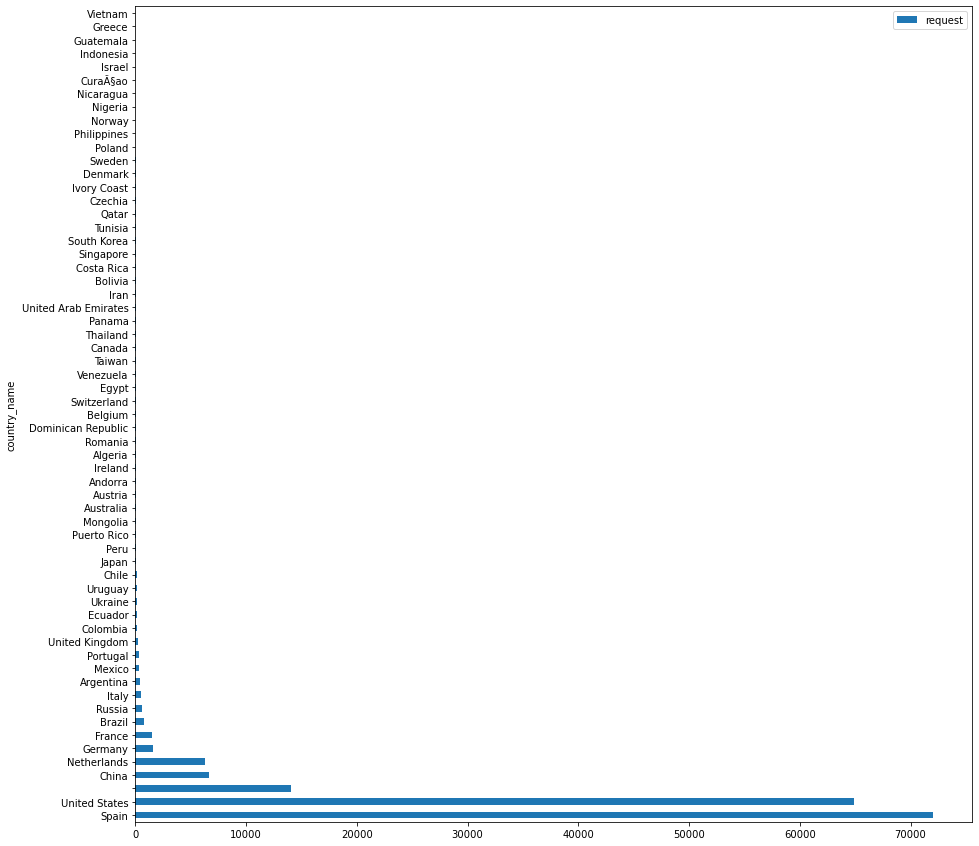

In [24]:
countries_most_requests.plot(kind='barh', figsize=(15,15));

Podem veure que els dos països amb més "requests" són, amb diferència, Espanya i els Estats Units. En tercer lloc tenim el que assumim són les "requests" fetes com a ``localhost``, i els altres països a remarcar són la Xina i els Països Baixos.

### Quines són les zones amb més volum de "requests"?

Sabem quins països tenen més requests, però volem saber específicament quines zones geogràfiques són les responsables de la majoria de requests, i com de repartides estan. Per a respondre aquesta pregunta crearem una visualització amb l'ajuda de [GeoPandas](https://geopandas.org/) i [shapely](https://pypi.org/project/Shapely/)

In [25]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [26]:
# sistema de referència de coordenades
crs = 'epsg:4326'

Creem les figures geomètriques que farà servir GeoPandas:

In [27]:
geometry = [Point(xy) for xy in zip(geo_log['longitude'], geo_log['latitude'])]

I creem un DataFrame específic de GeoPandas que contingui les figures geomètriques que acabem de crear:

In [28]:
geo_df = gpd.GeoDataFrame(geo_log, crs=crs, geometry=geometry)
geo_df.tail()

,hostname,ip,datetime,request,requested,protocol,code,code2,code_body,user_agent,country_name,latitude,longitude,geometry
171669,www.akumenius.com,46.222.83.180,2014-03-02 02:26:08+01:00,POST,/raton-search,HTTP/1.1,200,26,http://www.akumenius.com/escapadas/romanticas-...,Mozilla/5.0 (Linux; Android 4.3; GT-I9300 Buil...,Spain,40.4143,-3.7016,POINT (-3.70160 40.41430)
171670,www.akumenius.com,46.222.83.180,2014-03-02 02:26:08+01:00,POST,/raton-search,HTTP/1.1,200,26,http://www.akumenius.com/escapadas/romanticas-...,Mozilla/5.0 (Linux; Android 4.3; GT-I9300 Buil...,Spain,40.4143,-3.7016,POINT (-3.70160 40.41430)
171671,www.akumenius.com,79.155.78.117,2014-03-02 02:30:23+01:00,GET,/icon.png,HTTP/1.1,200,1089,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Spain,28.4853,-16.3201,POINT (-16.32010 28.48530)
171672,www.akumenius.com,188.135.173.80,2014-03-02 02:44:08+01:00,GET,/destinos-baratos/hoteles-en-Alvor_PORTUGAL,HTTP/1.0,200,21144,http://www.akumenius.com/,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,Italy,43.1479,12.1097,POINT (12.10970 43.14790)
171673,www.akumenius.com,206.198.5.33,2014-03-02 03:02:33+01:00,GET,/icon.png,HTTP/1.1,304,,-,Mozilla/4.0 (compatible;),United States,41.8483,-87.6517,POINT (-87.65170 41.84830)


Importem un mapa del món en format ``shapefile``, que es pot descarregar [aquí](https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1), i verifiquem que funcioni:

In [29]:
world = gpd.read_file('worldshape.shp')

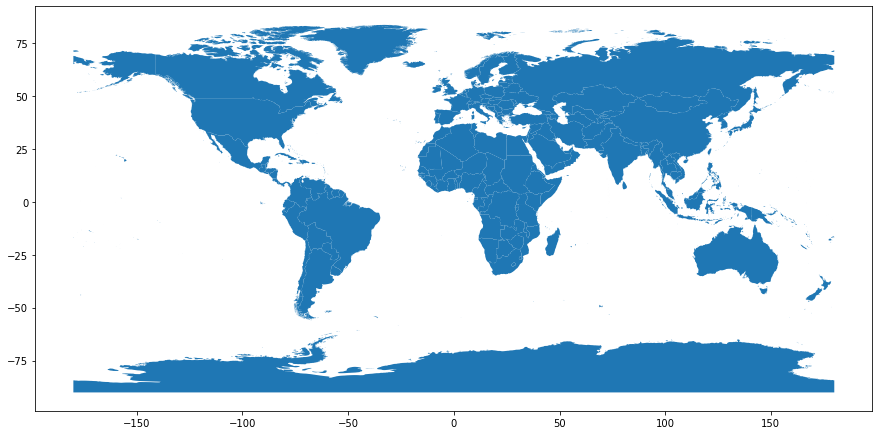

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
world.plot(ax=ax);

I finalment creem una visualització que mostri de forma clara la resposta a aquesta pregunta.

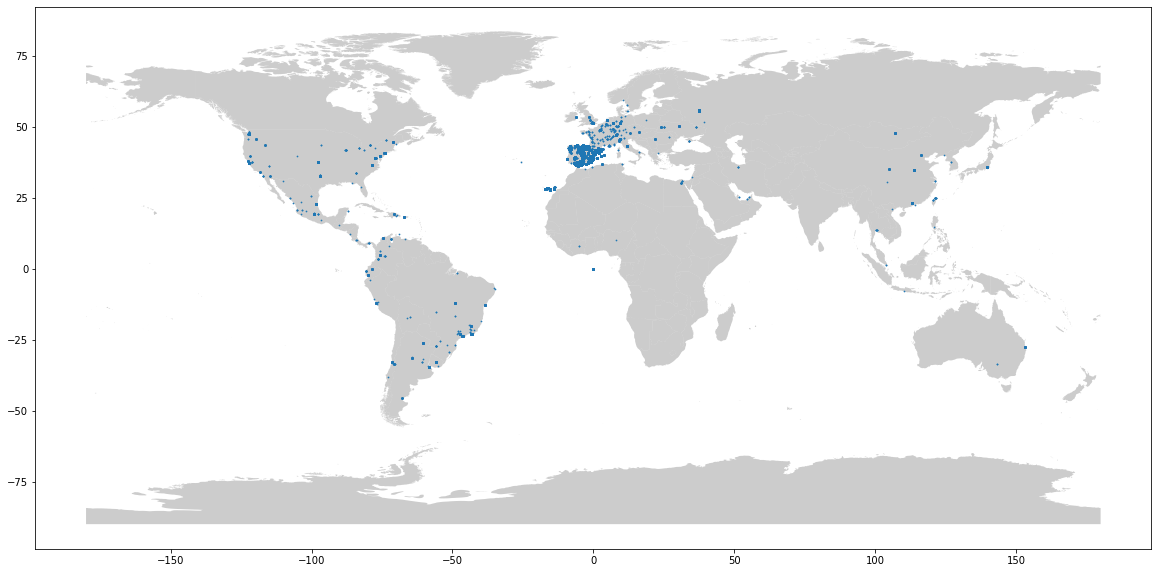

In [31]:
fig, ax = plt.subplots(figsize=(20,20))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df[['request', 'geometry']].plot(ax=ax, markersize=0.5)
plt.show()

Veiem que en general, les "requests" estan molt repartides geogràficament. Fins i tot dins d'Espanya, el país amb més volum de requests, podem observar que estan repartides per tot el país.

### Quins són els dominis més demanats d'aquest registre? I els elements?

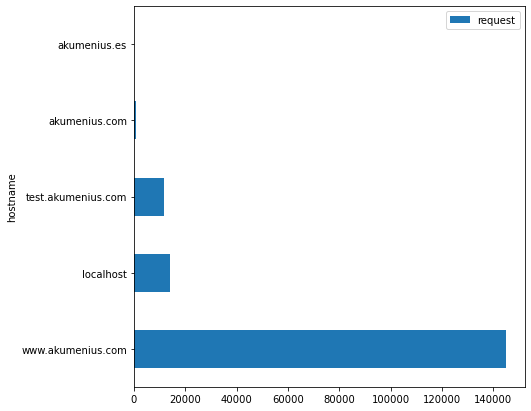

In [32]:
(
    geo_log[['hostname', 'request']]
        .groupby('hostname')
        .count()
        .sort_values(by='request', ascending=False)
        .plot(kind='barh', figsize=(7,7))
);

In [33]:
requested_pages = geo_log[['request', 'requested']]

In [34]:
most_requested_pages = (
    requested_pages[(requested_pages['request'] == 'GET') & (requested_pages['requested'] != '/')]
        .groupby('requested')
        .count()
        .sort_values(by='request', ascending=False)
    )
most_requested_pages

,request
requested,
/hotel-list,1442
/hotels-consulted-update,1007
/icon.png,979
/includes/css/style.css,828
/includes/images/uploaded/logo.png,779
...,...
/destinos-baratos/hoteles-en-Bintan-Island_INDONESIA,1
/destinos-baratos/hoteles-en-Birkenshaw_REINO%20UNIDO,1
/destinos-baratos/hoteles-en-BirminghamALESTADOS-UNIDOS_,1


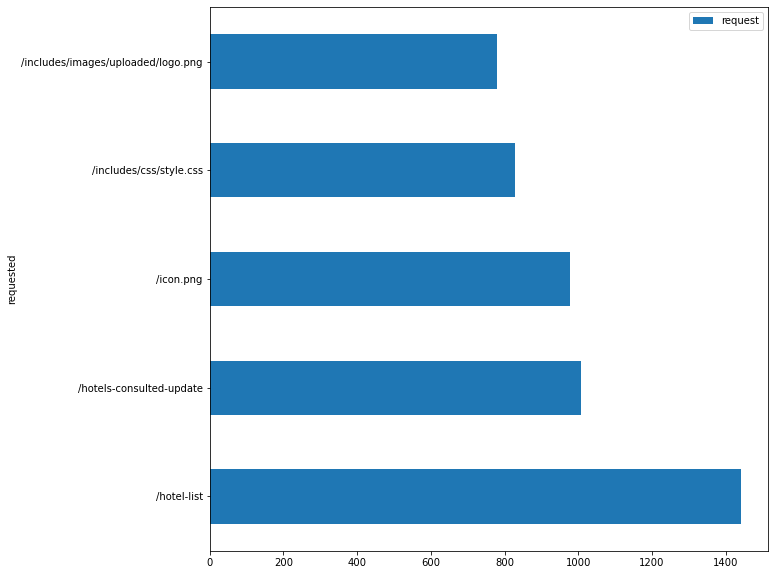

In [35]:
most_requested_pages.head().plot(kind='barh', figsize=(10,10));

### Quin és el protocol més comú?

In [36]:
protocol_count = (
    geo_log[['request', 'hostname']]
        .groupby('request')
        .count()
)

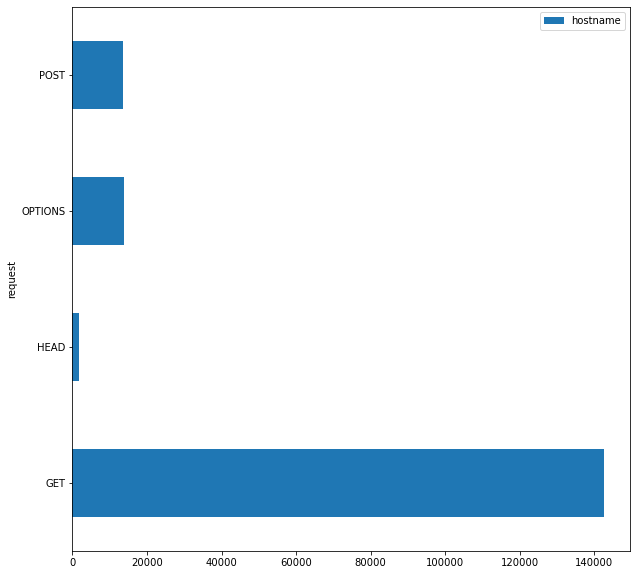

In [37]:
protocol_count.plot(kind='barh', figsize=(10,10));

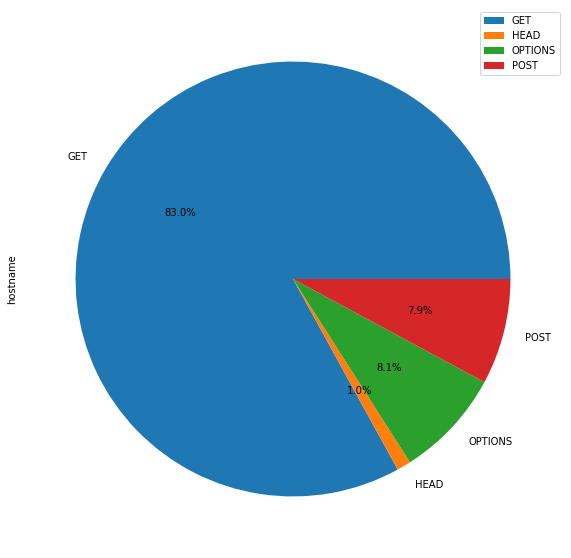

In [38]:
protocol_count.plot(kind='pie', figsize=(10,10), subplots=True, autopct='%1.1f%%');